# Разведочный анализ данных: начало

Мы будем работать с датасетом про алмазы - в нем содержатся их различные характеристики, а также стоимость.

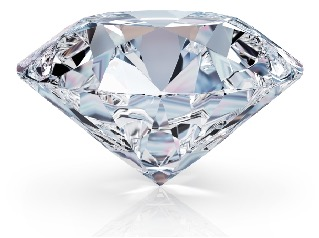

[Интересная статья про качество алмазов](https://www.diamonds.pro/education/diamond-depth-and-table/)

**Цели на сегодня:**

* понять влияние различных характеристик алмазов на их качество и стоимость

* научиться делать разведочный анализ данных

* изучить библиотеки pandas, numpy и matplotlib, seaborn

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [5]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DIAMONDS_DATASET = "/content/drive/MyDrive/data/eda/diamonds_good.csv"

In [61]:
df = pl.read_csv(DIAMONDS_DATASET)

## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [62]:
df.head(10)

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.23,"""Ideal""","""E""","""SI2""",61.5,55.0,326.0,3.95,3.98,2.43
0.21,"""Premium""","""E""","""SI1""",59.8,61.0,326.0,3.89,3.84,2.31
0.23,"""Good""","""E""","""VS1""",56.9,65.0,327.0,4.05,4.07,2.31
0.29,"""Premium""","""I""","""VS2""",62.4,58.0,334.0,4.2,4.23,2.63
0.31,"""Good""","""J""","""SI2""",63.3,58.0,335.0,4.34,4.35,2.75
null,"""Very Good""","""J""","""VVS2""",62.8,57.0,336.0,3.94,3.96,2.48
0.24,"""Very Good""","""I""","""VVS1""",62.3,57.0,336.0,3.95,3.98,2.47
0.26,"""Very Good""","""H""","""SI1""",61.9,55.0,337.0,4.07,4.11,2.53
0.22,"""Fair""","""E""","""VS2""",65.1,61.0,337.0,3.87,3.78,2.49


In [63]:
df.tail()

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.72,"""Ideal""","""D""","""SI1""",60.8,57.0,2757.0,5.75,5.76,3.5
0.72,"""Good""","""D""","""SI1""",63.1,55.0,2757.0,5.69,5.75,3.61
0.7,"""Very Good""","""D""","""SI1""",62.8,60.0,2757.0,5.66,5.68,3.56
0.86,"""Premium""","""H""","""SI2""",61.0,58.0,2757.0,6.15,6.12,3.74
0.75,"""Ideal""","""D""","""SI2""",62.2,55.0,2757.0,5.83,5.87,3.64


In [64]:
df.sample(3)

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
1.02,"""Ideal""","""G""","""VS2""",62.8,57.0,6169.0,6.46,6.41,4.04
1.05,"""Very Good""","""E""","""SI2""",62.2,59.0,3816.0,6.44,6.51,4.03
1.59,"""Ideal""","""J""","""VS1""",61.3,57.0,9494.0,7.5,7.55,4.61


## Исследование данных

Размер датасета

In [65]:
df.shape

(53940, 10)

Информация о типах данных и пропусках

In [66]:
df.schema

Schema([('carat', Float64),
        ('cut', String),
        ('color', String),
        ('clarity', String),
        ('depth', Float64),
        ('table', Float64),
        ('price', Float64),
        ("'x'", Float64),
        ("'y'", Float64),
        ("'z'", Float64)])

Основные числовые характеристики

In [67]:
df.describe()

statistic,carat,cut,color,clarity,depth,table,price,'x','y','z'
str,f64,str,str,str,f64,f64,f64,f64,f64,f64
"""count""",53442.0,"""53940""","""53940""","""53940""",52950.0,53940.0,53940.0,53940.0,53935.0,53940.0
"""null_count""",498.0,"""0""","""0""","""0""",990.0,0.0,0.0,0.0,5.0,0.0
"""mean""",0.797561,null,null,null,61.749422,57.457184,3932.799722,5.731157,5.734469,3.538734
"""std""",0.473534,null,null,null,1.431558,2.234491,3989.439738,1.121761,1.142125,0.705699
"""min""",0.2,"""Fair""","""D""","""I1""",43.0,43.0,326.0,0.0,0.0,0.0
"""25%""",0.4,null,null,null,61.0,56.0,950.0,4.71,4.72,2.91
"""50%""",0.7,null,null,null,61.8,57.0,2401.0,5.7,5.71,3.53
"""75%""",1.04,null,null,null,62.5,59.0,5324.0,6.54,6.54,4.04
"""max""",5.01,"""Very Good""","""J""","""VVS2""",79.0,95.0,18823.0,10.74,58.9,31.8


In [68]:
import polars.selectors as cs

for col in df.select(cs.string()).columns:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].n_unique()}")

    mode_series = df[col].mode()
    if mode_series.len() > 0:
        print(f"  Most frequent: {mode_series[0]}")

    vc = df[col].value_counts()
    if vc.height > 0:
        top = vc.sort('count', descending=True).head(1)
        print(f"  Most common: {top[col][0]}")
        print(f"  Count: {top['count'][0]}")


cut:
  Unique values: 6
  Most frequent: Ideal
  Most common: Ideal
  Count: 21524

color:
  Unique values: 7
  Most frequent: G
  Most common: G
  Count: 11292

clarity:
  Unique values: 8
  Most frequent: SI1
  Most common: SI1
  Count: 13065


In [70]:
duplicate_count = df.height - df.unique().height
duplicate_count

135

In [71]:
duplicates_df = df.filter(pl.struct(df.columns).is_duplicated())
duplicates_df

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
…,…,…,…,…,…,…,…,…,…
0.71,"""Good""","""F""","""SI2""",64.1,60.0,2130.0,0.0,0.0,0.0
0.51,"""Ideal""","""F""","""VVS2""",61.2,56.0,2203.0,5.19,5.17,3.17
0.51,"""Ideal""","""F""","""VVS2""",61.2,56.0,2203.0,5.19,5.17,3.17


In [72]:
print(f"Размер до удаления дубликатов: {df.shape}")
df = df.unique()
print(f"Размер после удаления дубликатов: {df.shape}")

Размер до удаления дубликатов: (53940, 10)
Размер после удаления дубликатов: (53805, 10)


In [73]:
df = df.with_row_index(name='index')  # добавляет колонку 'index' с 0,1,2,...

In [74]:
df.head()

index,carat,cut,color,clarity,depth,table,price,'x','y','z'
u32,f64,str,str,str,f64,f64,f64,f64,f64,f64
0,2.03,"""Premium""","""J""","""SI2""",61.7,61.0,12078.0,8.18,8.04,5.0
1,0.26,"""Very Good""","""D""","""VVS2""",62.4,54.0,554.0,4.08,4.13,2.56
2,0.7,"""Very Good""","""I""","""SI2""",63.2,60.0,1672.0,5.62,5.55,3.53
3,0.3,"""Very Good""","""I""","""VVS2""",62.1,56.0,533.0,4.27,4.31,2.66
4,0.3,"""Ideal""","""I""","""VVS2""",62.2,55.0,515.0,4.3,4.32,2.68


## Работа с пропущенными значениями

Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить или заполнить средним/медианой

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

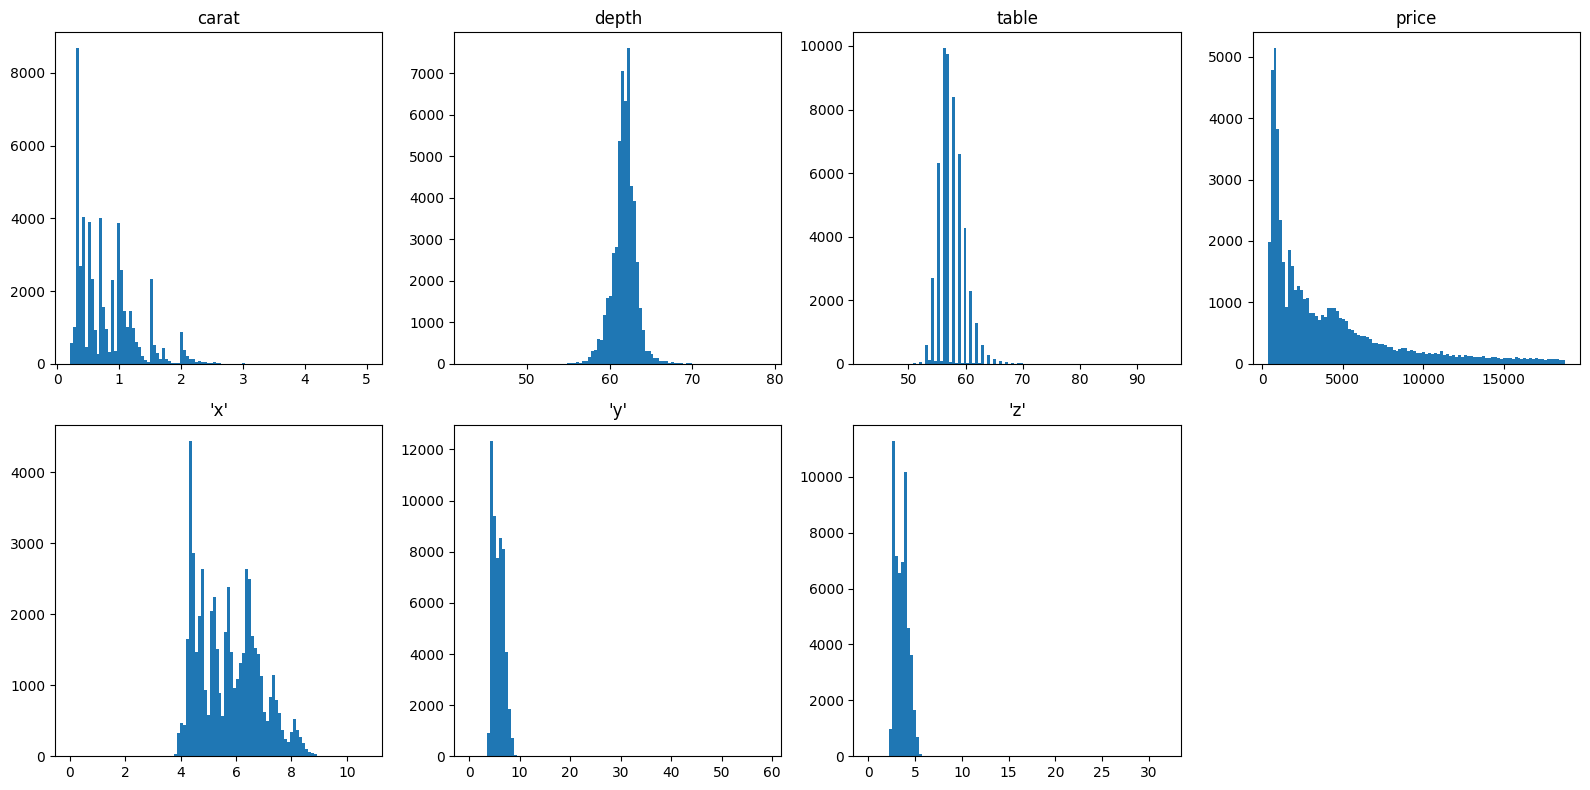

In [77]:
cols = ["carat", "depth", "table", "price", "'x'", "'y'", "'z'"]

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for idx, col in enumerate(cols):
    axes[idx].hist(df[col].to_numpy(), bins=100)
    axes[idx].set_title(col)

if len(cols) < len(axes):
    for j in range(len(cols), len(axes)):
        axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [78]:
median_carat = df['carat'].median()

df = df.with_columns(
    pl.col('carat').fill_null(median_carat)
)

In [79]:
median_depth = df['depth'].median()

df = df.with_columns(pl.col('depth').fill_null(median_depth))

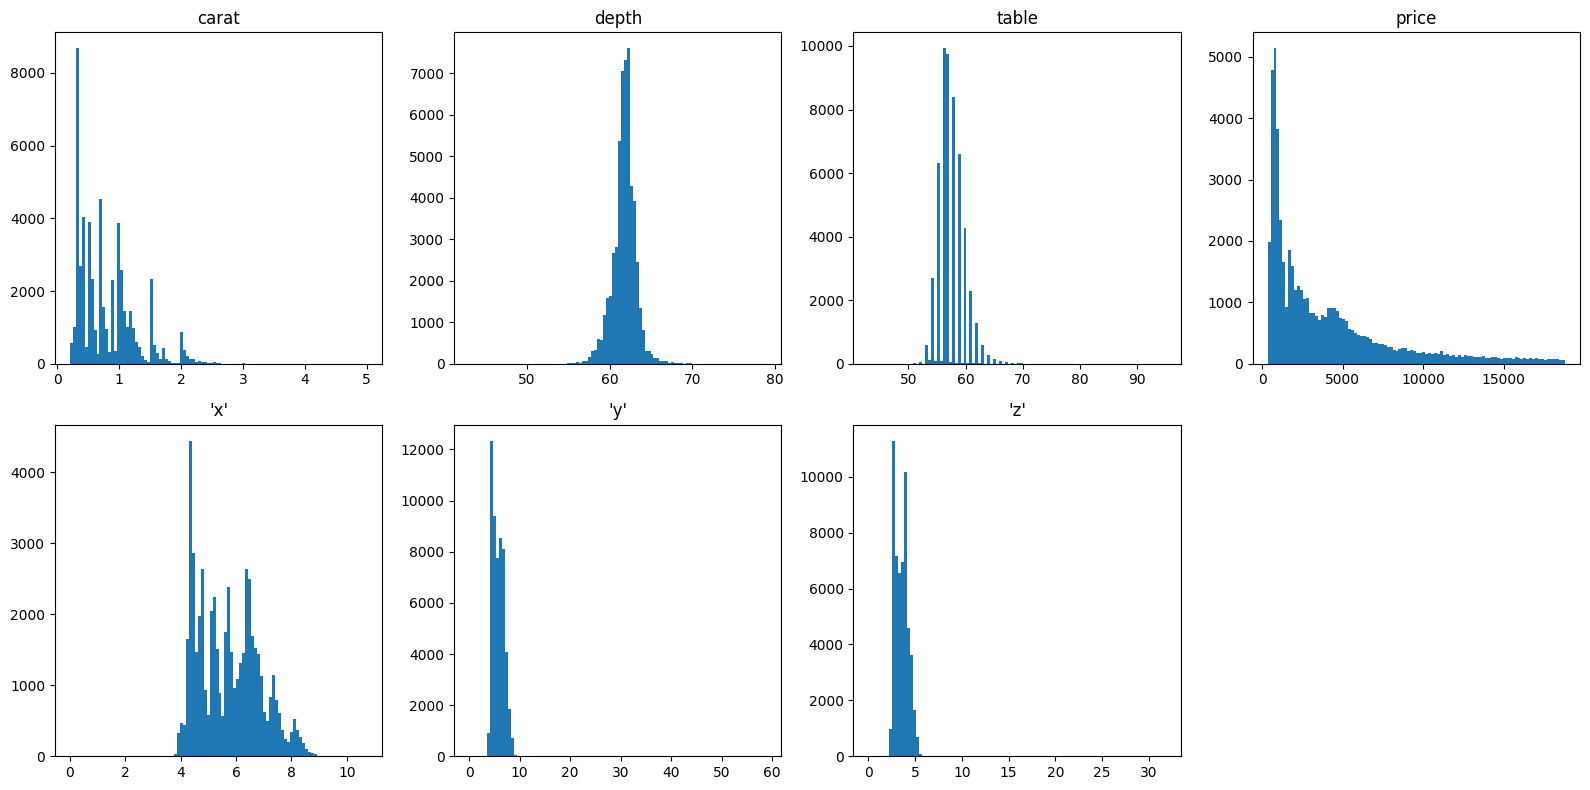

In [80]:
cols = ["carat", "depth", "table", "price", "'x'", "'y'", "'z'"]

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for idx, col in enumerate(cols):
    axes[idx].hist(df[col].to_numpy(), bins=100)
    axes[idx].set_title(col)

if len(cols) < len(axes):
    for j in range(len(cols), len(axes)):
        axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Задание 1

Заполните пропуски в столбце `y` медианным значением. Чему равно это значение? Ответ округлите до сотых.

In [82]:
# Подсчет пропусков до заполнения
missing_before = df["'y'"].null_count()
length = df.height
print(f"Пропусков до заполнения: {missing_before} из {length}")

Пропусков до заполнения: 5 из 53805


In [83]:
# Расчет медианного значения y и округление до 2 знаков
median_y = df["'y'"].median()
print(f"Медиана y: {median_y:.2f}")

Медиана y: 5.71


In [84]:
# Заполнение пропусков
df = df.with_columns(pl.col("'y'").fill_null(median_y))

In [85]:
# Подсчет пропусков после заполнения
missing_after = df["'y'"].null_count()
length = df.height
print(f"Пропусков после заполнения: {missing_after} из {length}")

Пропусков после заполнения: 0 из 53805


## Однофакторный анализ

### Число карат

* мелкие — массой до 0,30 карат (не включительно);
* средние — массой от 0,30 до 1 карат (не включительно);
* крупные – 1 карат и выше, называют солитеры.


Небольшие бриллианты различного размера, полученные при огранке алмаза, и весящие каждый в отдельности менее 0,25 карат, называют *melee (мили)*. Полученные таким же путем более крупные бриллианты различного размера называют *melange (меланж)*.


Бриллианты более 6 карат обычно продаются c аукционов.


Алмазам и бриллиантам более 25 карат присваивают собственные имена.

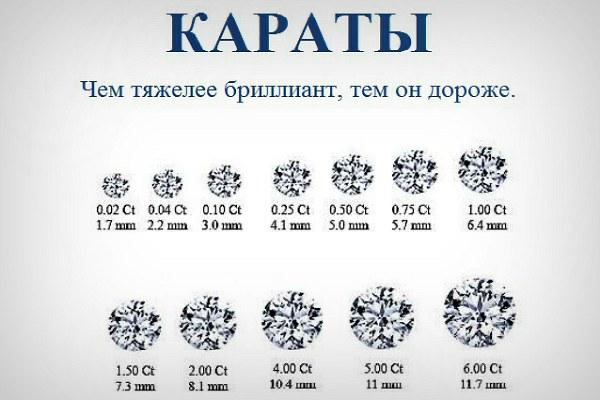

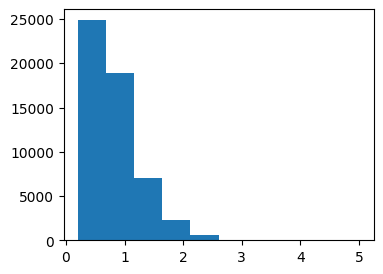

In [88]:
plt.figure(figsize=(4, 3))
plt.hist(df['carat'].to_numpy())
plt.show()

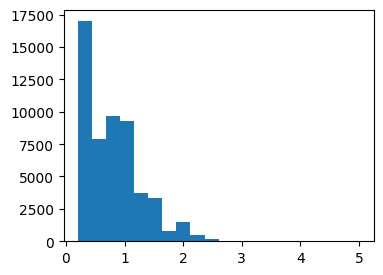

In [89]:
plt.figure(figsize=(4,3))
plt.hist(df['carat'].to_numpy(), bins=20)
plt.show()

Сколько карат весит самый тяжелый бриллиант в датасете? А самый легкий?

In [91]:
df['carat'].min(), df['carat'].max()

(0.2, 5.01)

Сколько мелких бриллиантов в датасете?

In [94]:
df.filter(pl.col('carat') < 0.3).height

1582

Сколько процентов бриллиантов среди всего датасета - крупные?

In [95]:
100 * (df['carat'] >= 1).mean()

35.00046464083263

Посмотрим как число карат влияет на стоимость алмаза

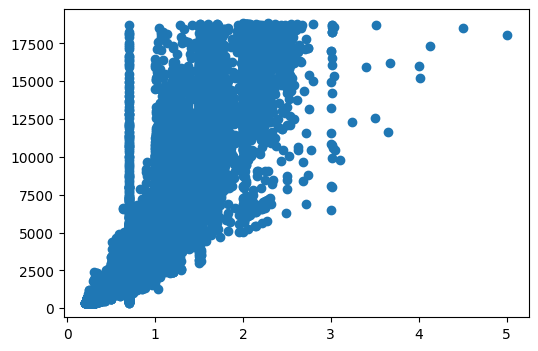

In [98]:
plt.figure(figsize=(6,4))
plt.scatter(df['carat'], df['price'])
plt.show()

In [99]:
np.corrcoef(df['carat'], df['price'])[0][1]

np.float64(0.9164989435440215)

### Cut (огранка алмаза)

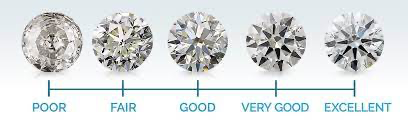

In [100]:
df['cut'].value_counts(normalize=True)

cut,proportion
str,f64
"""Fair""",0.0297
"""Very Good""",0.224013
"""Ideal""",0.398941
"""Good""",0.090772
"""Goood""",0.001487
"""Premium""",0.255088


In [103]:
df = df.with_columns(pl.col('cut').replace({'Goood': 'Good'}))

In [104]:
df['cut'].value_counts(normalize=True)

cut,proportion
str,f64
"""Very Good""",0.224013
"""Fair""",0.0297
"""Good""",0.092259
"""Ideal""",0.398941
"""Premium""",0.255088


Посмотрим как влияет огранка алмаза на его стоимость

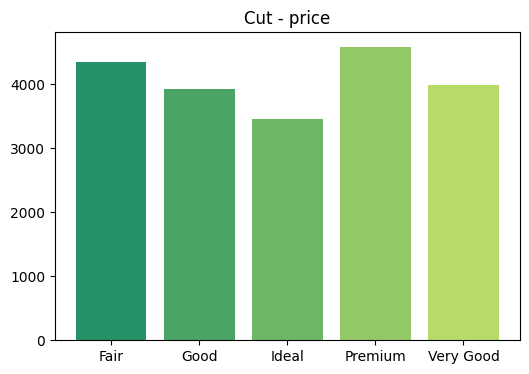

In [106]:
plt.figure(figsize=(6, 4))

cut_categories = df['cut'].unique().sort().to_list()
mean_prices = [df.filter(pl.col('cut') == cut)['price'].mean() for cut in cut_categories]

plt.bar(cut_categories, mean_prices, color=sns.color_palette('summer'))
plt.title('Cut - price')
plt.show()

### Задание 2

Какое максимальное число карат весит алмаз огранки `Fair`?
Ответ округлите до сотых.

In [108]:
max_carat_fair = df.filter(pl.col('cut') == 'Fair')['carat'].max()
print(f"{max_carat_fair:.2f}")

5.01


Посчитаем среднюю стоимость алмазов в каждой категории

In [111]:
df.group_by('cut').agg(pl.col('price').mean())

cut,price
str,f64
"""Good""",3926.266317
"""Ideal""",3462.59385
"""Premium""",4581.864918
"""Fair""",4347.735294
"""Very Good""",3982.162781


Посчитаем несколько характеристик в зависимости от огранки

In [112]:
df.group_by('cut').agg([
    pl.col('price').mean().alias('PriceMean'),
    pl.col('price').median().alias('PriceMedian'),
    pl.col('carat').mean().alias('CaratMean')
])

cut,PriceMean,PriceMedian,CaratMean
str,f64,f64,f64
"""Good""",3926.266317,3029.5,0.845796
"""Fair""",4347.735294,3282.0,1.040094
"""Premium""",4581.864918,3175.0,0.889616
"""Ideal""",3462.59385,1813.0,0.703331
"""Very Good""",3982.162781,2649.0,0.804177


In [113]:
df.group_by('cut').agg([
    pl.col('price').mean().alias('PriceMean'),
    pl.col('price').median().alias('PriceMedian'),
    pl.col('carat').mean().alias('CaratMean')
]).sort('PriceMean', descending=True)

cut,PriceMean,PriceMedian,CaratMean
str,f64,f64,f64
"""Premium""",4581.864918,3175.0,0.889616
"""Fair""",4347.735294,3282.0,1.040094
"""Very Good""",3982.162781,2649.0,0.804177
"""Good""",3926.266317,3029.5,0.845796
"""Ideal""",3462.59385,1813.0,0.703331


## Table and Depth

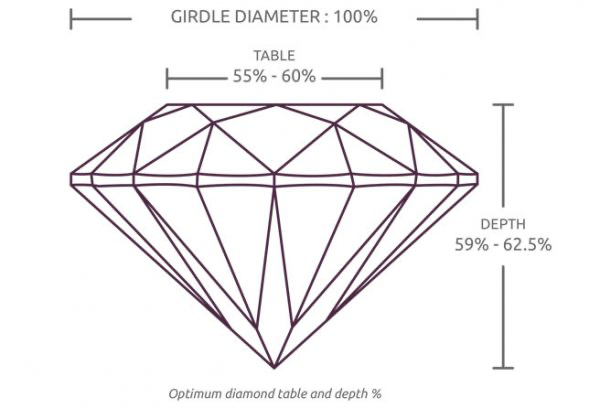

Оптимальное значение параметра `table` для алмаза [55%; 60%].

Какая доля алмазов в данных имеют оптимальное значение `table`?

In [114]:
pct = ((df['table'] >= 55) & (df['table'] <= 60)).mean() * 100
print(f"{pct:.2f}%")

84.39%


### Задание 3

Оптимальное значение параметра `depth` для алмаза [59%; 62.5%].

Какая доля алмазов в данных имеют одновременно оптимальное значение `table` и `depth`?

Ответ округлите до сотых.

In [119]:
opt_table = (df['table'] >= 55) & (df['table'] <= 60)
opt_depth = (df['depth'] >= 59) & (df['depth'] <= 62.5)
opt_both = opt_table & opt_depth
print(round(opt_both.sum() / df.height, 2))

0.62


### Задание 4

Сравните медианную стоимость всех алмазов, и алмазов с оптимальными table & depth. Какая больше?

In [120]:
# Медианы цен
median_all = df['price'].median()
median_optimal = df.filter(opt_both)['price'].median()

print(f"Медиана всех: {median_all:.0f}")
print(f"Медиана оптимальных: {median_optimal:.0f}")

if median_optimal > median_all:
    print("Оптимальные БОЛЬШЕ")
elif median_optimal < median_all:
    print("Оптимальные МЕНЬШЕ")
else:
    print("РАВНЫ")

Медиана всех: 2401
Медиана оптимальных: 2215
Оптимальные МЕНЬШЕ


Вычислите корреляцию `table` и `price`, а затем `depth`и `price`. Какой параметр влияет на цену больше?

In [121]:
np.corrcoef(df['table'], df['price'])[0][1]

np.float64(0.12662153885758187)

In [122]:
np.corrcoef(df['depth'], df['price'])[0][1]

np.float64(-0.01083161422683722)

table влияет больше

## Clarity - прозрачность алмаза

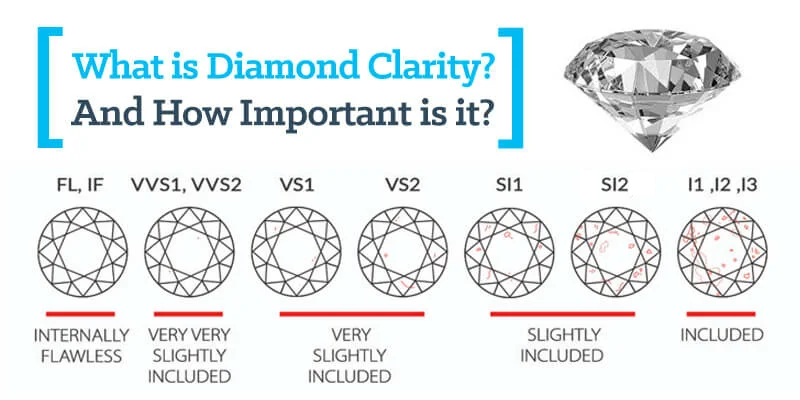

### Задание 5

Сколько различных градаций есть в столбце `clarity`?

In [123]:
unique_clarity = df['clarity'].unique()
print(f"Уникальные значения: {unique_clarity}")
print(f"Количество: {len(unique_clarity)}")

Уникальные значения: shape: (8,)
Series: 'clarity' [str]
[
	"SI2"
	"VS2"
	"SI1"
	"I1"
	"VVS2"
	"IF"
	"VVS1"
	"VS1"
]
Количество: 8


### Задание 6

Сколько алмазов в таблице, относящихся к категории `very very slightly included`?

In [124]:
vvs_count = df.filter(pl.col('clarity').is_in(['VVS1', 'VVS2'])).height
print(f"Количество алмазов VVS: {vvs_count}")

Количество алмазов VVS: 8704


### Задание 7

Нарисуйте график зависимости цены алмазов от `clarity`. Алмазы какой категории в наших данных стоят дороже остальных?

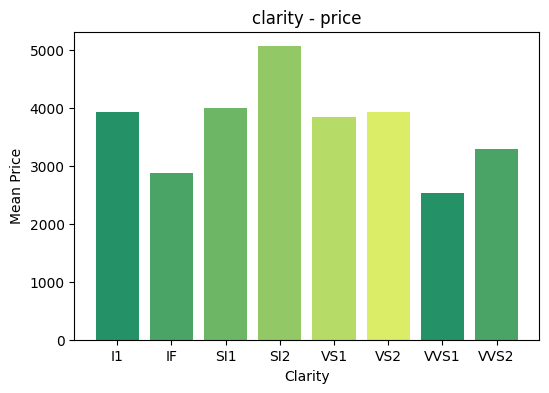

In [125]:
plt.figure(figsize=(6,4))

clarity_stats = df.group_by('clarity').agg(
    pl.col('price').mean().alias('mean_price')
).sort('clarity')

clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
clarity_stats = clarity_stats.sort(
    by='clarity',
    descending=False,
    maintain_order=True
)

plt.bar(clarity_stats['clarity'].to_numpy(),
        clarity_stats['mean_price'].to_numpy(),
        color=sns.color_palette('summer'))
plt.title('clarity - price')
plt.xlabel('Clarity')
plt.ylabel('Mean Price')
plt.show()

Дороже всех стоят алмазы категории **slightly included**, а конкретно SI2

### Задание 8

Для каждой пары значений категорий (`cut`,`clarity`) вычислим среднюю и медианную стоимость. Результат отсортируем по убыванию средней стоимости.

Алмазы какой огранки (`cut`) в совокупностью с некоторой категорией `clarity` имеют наибольшую среднюю стоимость?

In [126]:
grouped = df.group_by(['cut', 'clarity']).agg([
    pl.col('price').mean().alias('mean'),
    pl.col('price').median().alias('median')
]).sort('mean', descending=True)

print(grouped)

best_pair = grouped.row(0)
print(f"Наибольшая средняя стоимость: cut={best_pair[0]}, clarity={best_pair[1]}")
print(f"Средняя: {best_pair[2]:.2f}, Медиана: {best_pair[3]:.2f}")

shape: (40, 4)
┌───────────┬─────────┬─────────────┬────────┐
│ cut       ┆ clarity ┆ mean        ┆ median │
│ ---       ┆ ---     ┆ ---         ┆ ---    │
│ str       ┆ str     ┆ f64         ┆ f64    │
╞═══════════╪═════════╪═════════════╪════════╡
│ Premium   ┆ SI2     ┆ 5556.262491 ┆ 4292.5 │
│ Fair      ┆ SI2     ┆ 5145.740175 ┆ 3681.0 │
│ Very Good ┆ SI2     ┆ 4988.709447 ┆ 4042.0 │
│ Ideal     ┆ SI2     ┆ 4761.711917 ┆ 4068.0 │
│ Good      ┆ SI2     ┆ 4544.119816 ┆ 3763.0 │
│ …         ┆ …       ┆ …           ┆ …      │
│ Ideal     ┆ VVS1    ┆ 2474.09024  ┆ 1114.0 │
│ Very Good ┆ VVS1    ┆ 2451.883249 ┆ 941.0  │
│ Ideal     ┆ IF      ┆ 2279.618257 ┆ 1020.0 │
│ Good      ┆ VVS1    ┆ 2272.391534 ┆ 977.0  │
│ Fair      ┆ IF      ┆ 1912.333333 ┆ 1849.0 │
└───────────┴─────────┴─────────────┴────────┘
Наибольшая средняя стоимость: cut=Premium, clarity=SI2
Средняя: 5556.26, Медиана: 4292.50


# Домашнее задание

## 1) x, y, z

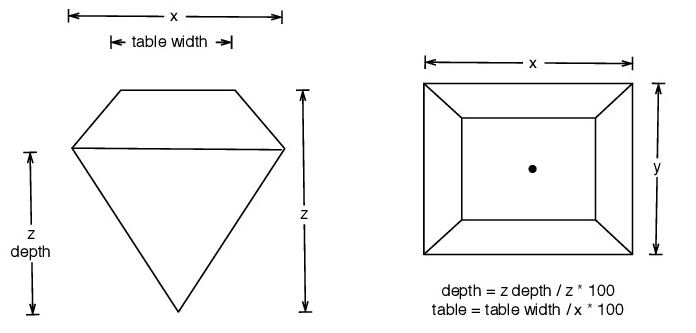

In [131]:
df.columns

['index',
 'carat',
 'cut',
 'color',
 'clarity',
 'depth',
 'table',
 'price',
 "'x'",
 "'y'",
 "'z'"]

Переименуем колонки

In [132]:
df = df.rename({"'x'": "x", "'y'": "y", "'z'": "z"})
df.columns

['index',
 'carat',
 'cut',
 'color',
 'clarity',
 'depth',
 'table',
 'price',
 'x',
 'y',
 'z']

### Задание 1

Для каждого из трех столбцов (`x`, `y`, `z`) вычислите медианное значение. В ответ запишите максимальное из полученных чисел без округлений.

In [133]:
x_median = df['x'].median()
y_median = df['y'].median()
z_median = df['z'].median()

print(f"x медиана = {x_median:.2f}")
print(f"y медиана = {y_median:.2f}")
print(f"z медиана = {z_median:.2f}")

max_median = max(x_median, y_median, z_median)
print(f"максимальное медианное значение = {max_median:.2f}")

x медиана = 5.70
y медиана = 5.71
z медиана = 3.53
максимальное медианное значение = 5.71


Для каждого из этих столбцов вычислите минимальное значение.

In [135]:
df.select([pl.col('x').min(), pl.col('y').min(), pl.col('z').min()])

x,y,z
f64,f64,f64
0.0,0.0,0.0


Нулевые размеры - явно ошибки.

### Задание 2

Выведите на экран все строки таблицы (только столбцы `x`,`y`,`z`), в которых хотя бы одна из координат равна нулю.

Сколько таких строк?

In [137]:
with_zero = df.filter(
    (pl.col('x') == 0) | (pl.col('y') == 0) | (pl.col('z') == 0)
)

pl.Config.set_tbl_rows(1000)
print(with_zero.select(['x', 'y', 'z']))
count_zero = with_zero.height
print(f"\nСтрок с нулевой координатой: {count_zero}")

shape: (19, 3)
┌──────┬──────┬─────┐
│ x    ┆ y    ┆ z   │
│ ---  ┆ ---  ┆ --- │
│ f64  ┆ f64  ┆ f64 │
╞══════╪══════╪═════╡
│ 0.0  ┆ 0.0  ┆ 0.0 │
│ 6.66 ┆ 6.6  ┆ 0.0 │
│ 6.5  ┆ 6.47 ┆ 0.0 │
│ 8.49 ┆ 8.45 ┆ 0.0 │
│ 6.88 ┆ 6.83 ┆ 0.0 │
│ 0.0  ┆ 0.0  ┆ 0.0 │
│ 8.9  ┆ 8.85 ┆ 0.0 │
│ 0.0  ┆ 0.0  ┆ 0.0 │
│ 0.0  ┆ 0.0  ┆ 0.0 │
│ 8.52 ┆ 8.42 ┆ 0.0 │
│ 6.55 ┆ 6.48 ┆ 0.0 │
│ 0.0  ┆ 6.62 ┆ 0.0 │
│ 6.5  ┆ 6.47 ┆ 0.0 │
│ 0.0  ┆ 0.0  ┆ 0.0 │
│ 8.42 ┆ 8.37 ┆ 0.0 │
│ 8.02 ┆ 7.95 ┆ 0.0 │
│ 0.0  ┆ 0.0  ┆ 0.0 │
│ 7.15 ┆ 7.04 ┆ 0.0 │
│ 6.71 ┆ 6.67 ┆ 0.0 │
└──────┴──────┴─────┘

Строк с нулевой координатой: 19


### Задание 3

Удалите из таблицы эти строки. Сколько строк осталось в таблице?

In [138]:
start_count = df.height

df = df.filter((pl.col('x') != 0) & (pl.col('y') != 0) & (pl.col('z') != 0))

end_count = df.height
removed = start_count - end_count
print(f"Удалено строк: {removed}")

Удалено строк: 19


### Задание 4

Вычислите корреляцию между каждым из этих столбцов и `price`. Какой столбец коррелирует с ценой алмаза больше всего?

In [139]:
cols = ['x', 'y', 'z']

for col in cols:
    corr = df.select(pl.corr(col, 'price')).item()
    print(f"{col} - price: {corr:.3f}")

max_corr = max(
    [(col, df.select(pl.corr(col, 'price')).item()) for col in cols],
    key=lambda x: abs(x[1])
)
print(f"\nМаксимальная корреляция: {max_corr[0]} = {max_corr[1]:.3f}")

x - price: 0.887
y - price: 0.868
z - price: 0.868

Максимальная корреляция: x = 0.887


### Задание 5

Постройте scatter-plot для отражения зависимости между ценой алмаза и координатой, наиболее с ней коррелирующей. На какую зависимость она больше всего похожа?

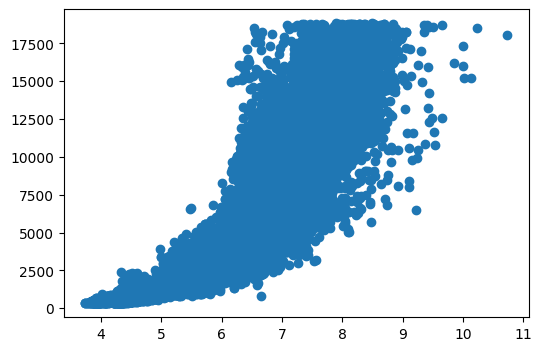

In [140]:
plt.figure(figsize=(6,4))
plt.scatter(df['x'].to_numpy(), df['price'].to_numpy())
plt.show()

### Задание 6

Какой процент среди всех алмазов имеет `x` и `y` размеры, превышающие средние значения (по `x` и `y`)? Ответ округлите до целого числа.

In [141]:
mean_x = df['x'].mean()
mean_y = df['y'].mean()

above_mean = df.filter((pl.col('x') > mean_x) & (pl.col('y') > mean_y))
percentage = above_mean.height / df.height * 100

print(f"Алмазов с x>{mean_x:.2f} и y>{mean_y:.2f}: {percentage:.0f}%")

Алмазов с x>5.73 и y>5.73: 47%


### Задание 7

Какая доля среди крупных алмазов имеет `z`-размеры, меньшие медианного? Ответ округлите до четырех знаков после запятой.

In [142]:
median_carat = df['carat'].median()
median_z = df['z'].median()

big_diamonds = df.filter(pl.col('carat') > median_carat)
z_smaller = big_diamonds.filter(pl.col('z') < median_z)
proportion = z_smaller.height / big_diamonds.height

print(f"Медиана carat: {median_carat:.2f}")
print(f"Медиана z: {median_z:.2f}")
print(f"Крупных алмазов: {big_diamonds.height}")
print(f"Из них с z < медианы: {z_smaller.height}")
print(f"Доля: {proportion:.4f}")

Медиана carat: 0.70
Медиана z: 3.53
Крупных алмазов: 26443
Из них с z < медианы: 751
Доля: 0.0284


## 2) Color

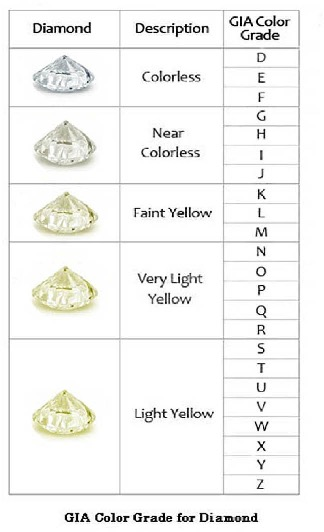

### Задание 8

К каким категориям (Description) из градации выше относятся алмазы в данных?

In [143]:
unique_colors = df['color'].unique().sort()
print(unique_colors.to_list())

['D', 'E', 'F', 'G', 'H', 'I', 'J']


Colorless (D E F), Near Colorless (G H I J)

### Задание 9

Нарисуйте график, отражающий зависимость стоимости алмазов от его категории цвета.

Алмазы какого цвета стоят дороже остальных?

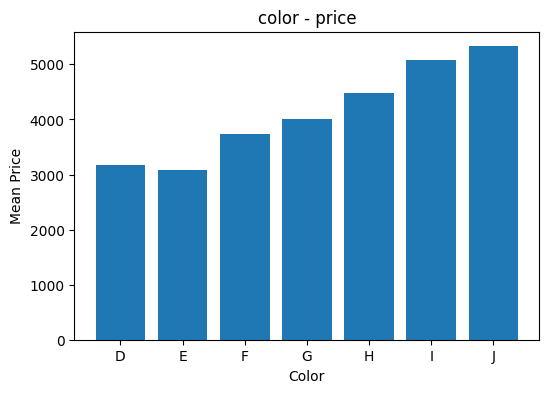

In [144]:
plt.figure(figsize=(6,4))

color_stats = df.group_by('color').agg(
    pl.col('price').mean().alias('mean_price')
).sort('color')

plt.bar(color_stats['color'].to_numpy(),
        color_stats['mean_price'].to_numpy())
plt.title('color - price')
plt.xlabel('Color')
plt.ylabel('Mean Price')
plt.show()

Near Colorless стоят дороже. Дороже всех J.

### Задание 10

Для каждого цвета алмаза вычислите медианную стоимость и медианный вес (в каратах). Отсортируйте полученную при помощи groupby таблицу по убыванию медианной стоимости.

Верно ли, что при убывании PriceMedian, сгруппированной по цвету, CaratMedian также убывает? (не возрастает)

In [146]:
grouped = df.group_by('color').agg([
    pl.col('price').median().alias('PriceMedian'),
    pl.col('carat').median().alias('CaratMedian')
]).sort('PriceMedian', descending=True)

grouped

color,PriceMedian,CaratMedian
str,f64,f64
"""J""",4234.5,1.11
"""I""",3721.5,1.0
"""H""",3449.5,0.9
"""F""",2345.0,0.7
"""G""",2242.0,0.7
"""D""",1842.0,0.54
"""E""",1741.0,0.54


Верно

### Задание 11

Вычислите среднюю стоимость алмазов по каждой тройке категорий (`cut`,`color`,`clarity`). Какие алмазы дороже остальных?

В ответе запишите тройку названий в скобках через запятую, без кавычек и пробелов. Например, (Premium,D,IF)

In [147]:
grouped = df.group_by(['cut', 'color', 'clarity']).agg(pl.col('price').mean().alias('price')).sort('price', descending=True)
grouped

cut,color,clarity,price
str,str,str,f64
"""Very Good""","""D""","""IF""",10298.26087
"""Good""","""D""","""IF""",10030.333333
"""Ideal""","""J""","""I1""",9454.0
"""Premium""","""D""","""IF""",9056.5
"""Premium""","""J""","""SI2""",7550.285714
"""Fair""","""D""","""I1""",7383.0
"""Premium""","""J""","""VVS1""",7244.375
"""Ideal""","""I""","""SI2""",7204.96337
"""Premium""","""I""","""SI2""",7161.345277


In [148]:
most_expensive = grouped.row(0)

print(f"({most_expensive[0]},{most_expensive[1]},{most_expensive[2]})")
print(f"Средняя цена: {most_expensive[3]:.2f}")

(Very Good,D,IF)
Средняя цена: 10298.26


Ответ: (Very Good,D,IF)